# A. Perform Principal Component Analysis (PCA) on the dataset ‘auto-mpg.csv’.
1. Load dataset ‘auto-mpg.csv'. Create a dataframe df.
2. Convert the feature 'horsepower' from object to integer.
3. Drop the feature 'car name' as it has object data type.
4. Import Standard Scaler and perform standardization on the entire data frame.
5. Perform PCA.

In [1]:
# Step 1: Load dataset ‘auto-mpg.csv' and create a dataframe df.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('auto-mpg.xlsx')

df


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
df['horsepower'].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

In [4]:
df['horsepower'].value_counts()

horsepower
150    22
90     20
88     19
110    18
100    17
       ..
61      1
93      1
148     1
152     1
82      1
Name: count, Length: 94, dtype: int64

In [5]:
df['horsepower'].isnull().sum()

0

In [6]:
df['horsepower'].isna().sum()

0

In [7]:
# Step 2: Convert the feature 'horsepower' from object to integer.
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['horsepower']

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64

In [8]:
# Fill any NaN values in 'horsepower' with the column mean (or use a different imputation method if needed)
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)
df['horsepower'] = df['horsepower'].astype(int)

In [9]:
#Drop the feature 'car name' as it has an object data type.
df = df.drop(columns=['car name'])

In [10]:
#Import StandardScaler and perform standardization on the entire dataframe.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler

StandardScaler()

In [11]:
df_scaled = scaler.fit_transform(df)

In [12]:
df_scaled=pd.DataFrame(df_scaled, columns = df.columns)
df_scaled

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,-0.706439,1.498191,1.090604,0.669381,0.630870,-1.295498,-1.627426,-0.715145
1,-1.090751,1.498191,1.503514,1.586783,0.854333,-1.477038,-1.627426,-0.715145
2,-0.706439,1.498191,1.196232,1.193611,0.550470,-1.658577,-1.627426,-0.715145
3,-0.962647,1.498191,1.061796,1.193611,0.546923,-1.295498,-1.627426,-0.715145
4,-0.834543,1.498191,1.042591,0.931496,0.565841,-1.840117,-1.627426,-0.715145
...,...,...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.513026,-0.483925,-0.213324,0.011586,1.621983,-0.715145
394,2.624265,-0.856321,-0.925936,-1.375115,-0.993671,3.279296,1.621983,0.533222
395,1.087017,-0.856321,-0.561039,-0.536348,-0.798585,-1.440730,1.621983,-0.715145
396,0.574601,-0.856321,-0.705077,-0.667405,-0.408411,1.100822,1.621983,-0.715145


In [13]:
# Step 5: Perform PCA.
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca


PCA(n_components=2)

In [14]:
pca_components = pca.fit_transform(df_scaled)

In [15]:
pca.explained_variance_ratio_

array([0.67006457, 0.11782424])

In [16]:
pca.explained_variance_ratio_.sum()

0.7878888139961436

In [17]:
df2=pd.DataFrame(data=pca_components,columns=['PC1','PC2'])
df2

,PC1,PC2
0,2.741941,0.956917
1,3.568309,1.064588
2,3.060005,1.173284
3,3.005334,1.054107
4,2.994423,1.246244
...,...,...
393,-1.163277,-1.340212
394,-4.056994,-2.130756
395,-1.302598,-0.643684
396,-1.732976,-1.768163


# B. Perform Principal Component Analysis (PCA) on the dataset ‘Titanic-Dataset.csv’.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# 1. Load dataset ‘Titanic-Dataset.csv’. Create a dataframe df.
df=pd.read_excel('Titanic-Dataset.xlsx')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
# 2. Convert the feature ' Embarked' from object to integer using map function.
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [21]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [22]:
df['Embarked'].isnull().sum()

2

In [23]:
df['Embarked'] = df['Embarked'].fillna('S')

In [24]:
df['Embarked'].isnull().sum()

0

In [25]:
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df['Embarked'].unique()

array([0, 1, 2], dtype=int64)

In [26]:
# 3. Covert the feature ‘Ticket’ from object to integer.
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', 113803, 373450,
       330877, 17463, 349909, 347742, 237736, 'PP 9549', 113783,
       'A/5. 2151', 347082, 350406, 248706, 382652, 244373, 345763, 2649,
       239865, 248698, 330923, 113788, 347077, 2631, 19950, 330959,
       349216, 'PC 17601', 'PC 17569', 335677, 'C.A. 24579', 'PC 17604',
       113789, 2677, 'A./5. 2152', 345764, 2651, 7546, 11668, 349253,
       'SC/Paris 2123', 330958, 'S.C./A.4. 23567', 370371, 14311, 2662,
       349237, 3101295, 'A/4. 39886', 'PC 17572', 2926, 113509, 19947,
       'C.A. 31026', 2697, 'C.A. 34651', 'CA 2144', 2669, 113572, 36973,
       347088, 'PC 17605', 2661, 'C.A. 29395', 'S.P. 3464', 3101281,
       315151, 'C.A. 33111', 'S.O.C. 14879', 2680, 1601, 348123, 349208,
       374746, 248738, 364516, 345767, 345779, 330932, 113059,
       'SO/C 14885', 3101278, 'W./C. 6608', 'SOTON/OQ 392086', 343275,
       343276, 347466, 'W.E.P. 5734', 'C.A. 2315', 364500, 374910,
       'PC 17754', 'PC 

In [27]:
def covn_int(val):
  if isinstance(val, str):
    num = val.split(" ")[-1]
    return int(num) if num.isdigit() else 0
  else:
    return val

In [28]:
df['Ticket'] = df['Ticket'].apply(covn_int)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,6607,23.4500,NaN,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,1


In [29]:
# 4. Drop the feature 'Name', ’Sex’, ’Cabin’ as it has object data type.
df.drop(['Name', 'Sex', 'Cabin'], axis=1, inplace=True)

In [30]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,22.0,1,0,21171,7.2500,0
1,2,1,1,38.0,1,0,17599,71.2833,1
2,3,1,3,26.0,0,0,3101282,7.9250,0
3,4,1,1,35.0,1,0,113803,53.1000,0
4,5,0,3,35.0,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,211536,13.0000,0
887,888,1,1,19.0,0,0,112053,30.0000,0
888,889,0,3,NaN,1,2,6607,23.4500,0
889,890,1,1,26.0,0,0,111369,30.0000,1


In [31]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [32]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [33]:
df['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [34]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df.isnull().sum().count()

9

In [35]:
# 5. Import Standard Scaler and perform standardization on the entire data frame.
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc

StandardScaler()

In [36]:
df1= sc.fit_transform(df)

In [37]:
df1=pd.DataFrame(df1, columns = df.columns)
df1

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked
0,-1.730108,-0.789272,0.827377,-0.565736,0.432793,-0.473674,-0.420410,-0.502445,-0.568837
1,-1.726220,1.266990,-1.566107,0.663861,0.432793,-0.473674,-0.425854,0.786845,1.005181
2,-1.722332,1.266990,0.827377,-0.258337,-0.474545,-0.473674,4.274382,-0.488854,-0.568837
3,-1.718444,1.266990,-1.566107,0.433312,0.432793,-0.473674,-0.279217,0.420730,-0.568837
4,-1.714556,-0.789272,0.827377,0.433312,-0.474545,-0.473674,0.116544,-0.486337,-0.568837
...,...,...,...,...,...,...,...,...,...
886,1.714556,-0.789272,-0.369365,-0.181487,-0.474545,-0.473674,-0.130250,-0.386671,-0.568837
887,1.718444,1.266990,-1.566107,-0.796286,-0.474545,-0.473674,-0.281885,-0.044381,-0.568837
888,1.722332,-0.789272,0.827377,-0.104637,0.432793,2.008933,-0.442609,-0.176263,-0.568837
889,1.726220,1.266990,-1.566107,-0.258337,-0.474545,-0.473674,-0.282927,-0.044381,1.005181


In [38]:
# 6. Perform PCA.
from sklearn.decomposition import PCA

In [39]:
pca = PCA(n_components=5)
pca

PCA(n_components=5)

In [40]:
pca1=pca.fit_transform(df1)
pca1

array([[-1.25005701,  0.24370474,  0.2632188 , -1.58056207, -0.59372913],
       [ 2.12896612, -0.09847277,  1.22118079, -1.67344328,  0.19248158],
       [-1.93660209,  0.08325793,  0.02777991, -1.98760464,  3.73962807],
       ...,
       [-0.59512745,  1.35376074, -1.18599677,  1.73292885, -1.06585159],
       [ 1.56623425, -0.72100195,  0.68921989,  1.84723487,  0.7631316 ],
       [-0.79987892, -1.13263459,  1.37787712,  2.00201606, -1.02913173]])

In [41]:
pca.explained_variance_ratio_

array([0.22127782, 0.18339313, 0.12448476, 0.10992407, 0.10451057])

In [42]:
pca.explained_variance_ratio_.sum()

0.743590351992325

In [43]:
df2=pd.DataFrame(data=pca1,columns=['PC1','PC2','PC3','PC4','PC5'])
df2

,PC1,PC2,PC3,PC4,PC5
0,-1.250057,0.243705,0.263219,-1.580562,-0.593729
1,2.128966,-0.098473,1.221181,-1.673443,0.192482
2,-1.936602,0.083258,0.027780,-1.987605,3.739628
3,1.699533,0.057277,0.103661,-1.864021,0.749537
4,-1.131230,-0.690170,-0.118712,-1.784860,-0.317483
...,...,...,...,...,...
886,-0.281216,-0.797342,-1.037378,1.486989,-0.131523
887,1.299506,-0.361452,-0.310128,1.702869,1.323046
888,-0.595127,1.353761,-1.185997,1.732929,-1.065852
889,1.566234,-0.721002,0.689220,1.847235,0.763132


Text(0.5, 1.0, 'PCA')

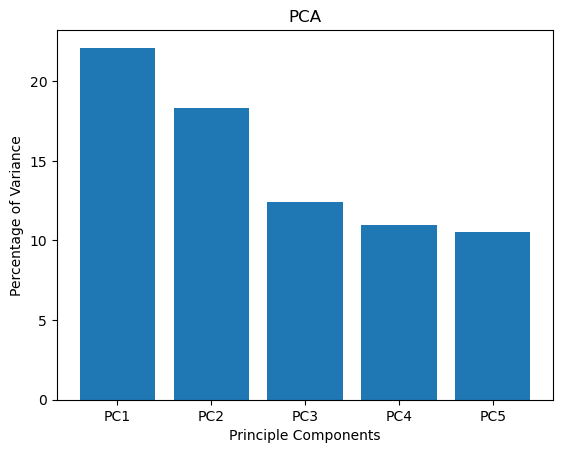

In [44]:
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
label=['PC'+str(x) for x in range(1,len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=label)
plt.ylabel('Percentage of Variance')
plt.xlabel('Principle Components')
plt.title('PCA')